# Imports

In [3]:
import sys
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [4]:
import PolynomialRegression

# Get data

In [5]:
df = pd.read_csv('EconomiesOfScale.csv', encoding='ISO-8859-1')

# Run 1th to 16th degree regression functions

In [6]:
myRegressionContainer = []
independent = 'Number of Units'
dependent   = 'Manufacturing Cost'

for i in range(1, 17):
    myRegression = PolynomialRegression.RegressionByDegree(i)
    myRegression.set_data_train(df[[independent]])
    myRegression.set_data_train_y(df[[dependent]])
    myRegression.apply_regression()
    myRegression.set_model_evaluation(df[[independent]], df[[dependent]])
    myRegressionContainer.append(myRegression)

run 16 regressions for degree 1 (linear) to degree 16 

#  Visualize all 16 regression functions

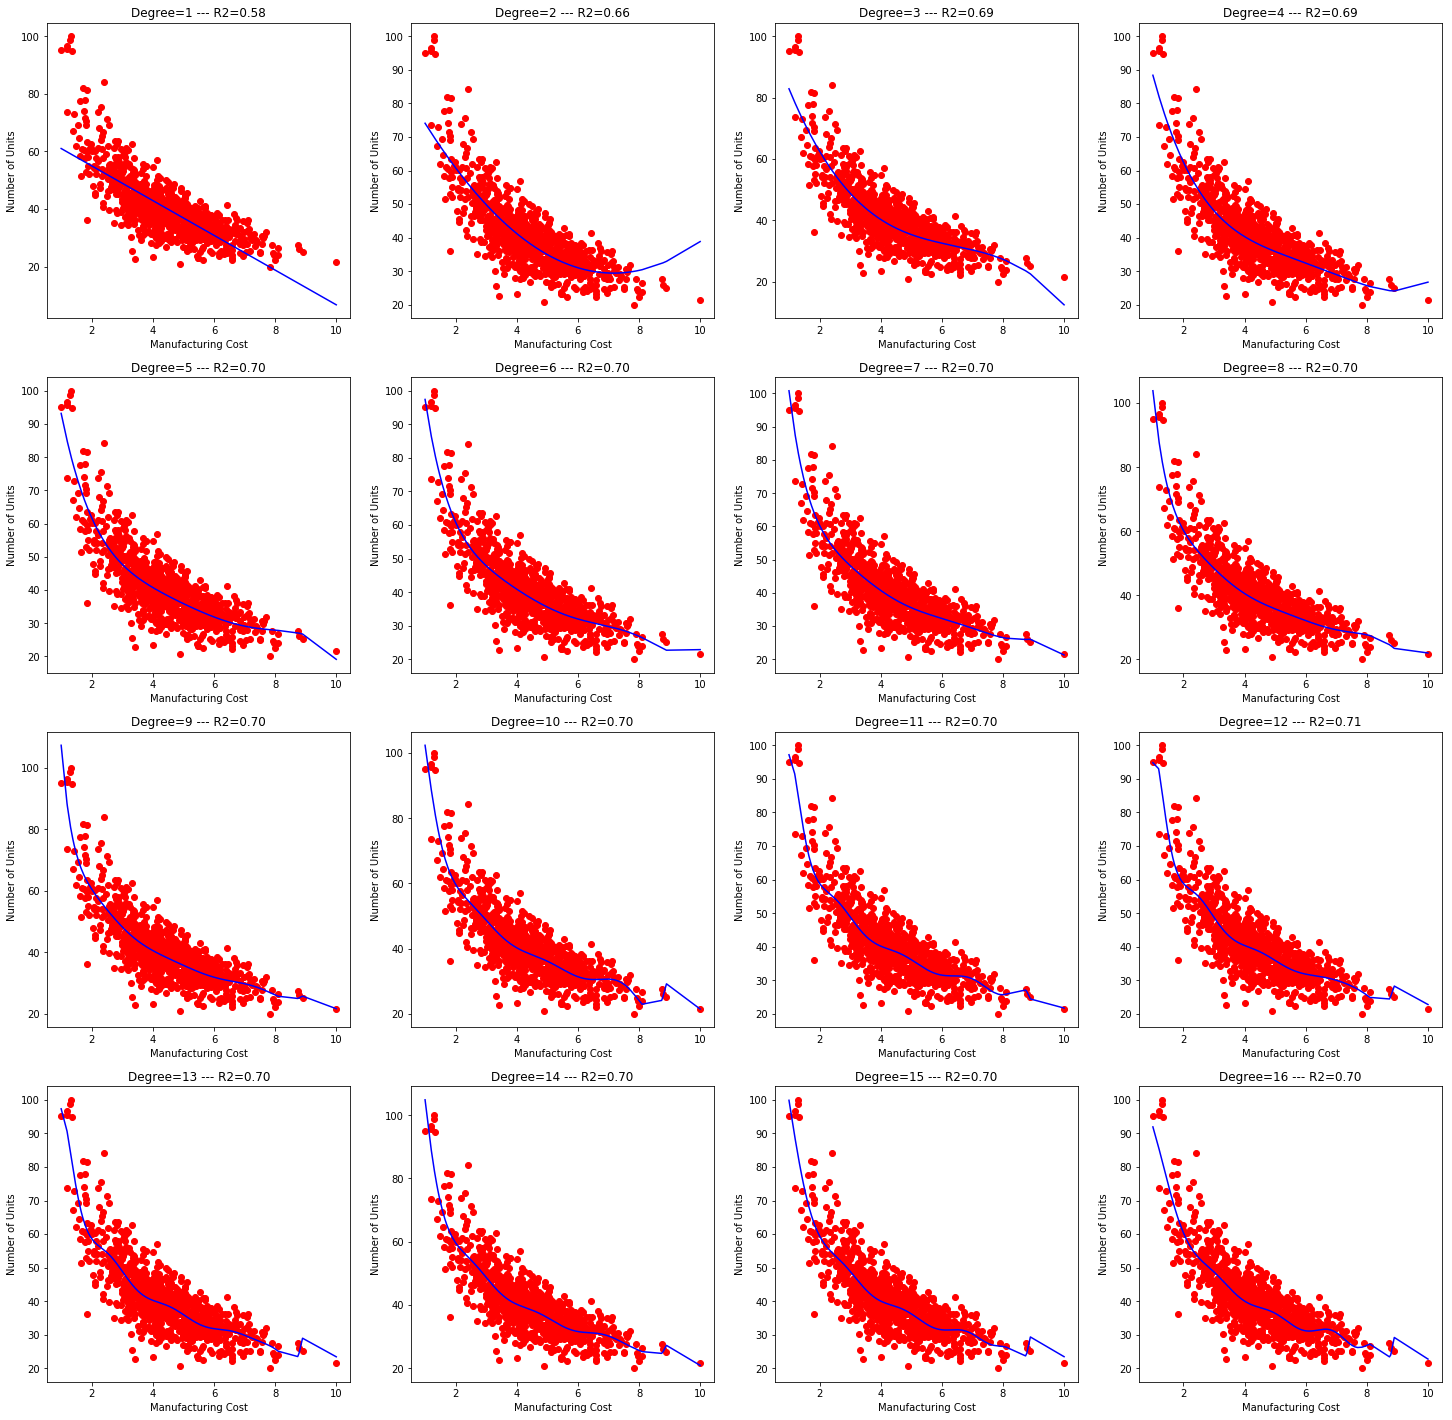

In [7]:
import matplotlib.pyplot as plt
independent = 'Number of Units'
dependent   = 'Manufacturing Cost'

fig, ax = plt.subplots(4, 4, figsize = (25, 25))

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.title("Degree=" + str(myRegressionContainer[i-1].get_degree()) + " --- R2=" + str(myRegressionContainer[i-1].get_adj_r2()))
    plt.scatter(df[[independent]], df[[dependent]], color = 'red')
    plt.ylabel(independent)
    plt.xlabel(dependent)
    plt.plot(df[[independent]], myRegressionContainer[i-1].get_predict_y(), color = 'blue')

the coefficient of determination (R2 - the proportion of the variance which can be explained by the independent variable) is not improving from degree 5 upwards,
looking at the x-axis cost between 8-10: for the higher degree regressions, some curves do not look plausible at all

# Visualize the error metrics for all 16 regressions

In [8]:
column_header = np.array(['degree','adj_r2','r2','MAE','MSE','RMSE','MAPE'])
myErrors_df = pd.DataFrame()

for i in range(1, 17):
    myErrors = pd.DataFrame([
                myRegressionContainer[i-1].get_degree(),
                myRegressionContainer[i-1].get_adj_r2(),
                myRegressionContainer[i-1].get_r2(),
                myRegressionContainer[i-1].get_MAE(),
                myRegressionContainer[i-1].get_MSE(),
                myRegressionContainer[i-1].get_RMSE(),
                myRegressionContainer[i-1].get_MAPE()])
    myErrors.index = column_header
    myErrors = myErrors.transpose()
    myErrors_df = pd.concat([myErrors_df, myErrors]).reset_index(drop=True)
myErrors_df

,degree,adj_r2,r2,MAE,MSE,RMSE,MAPE
0,1,0.58,0.58,4.92,47.22,6.87,12.69
1,2,0.66,0.67,4.54,37.57,6.13,11.64
2,3,0.69,0.69,4.47,35.07,5.92,11.45
3,4,0.69,0.69,4.44,34.41,5.87,11.37
4,5,0.70,0.70,4.41,34.08,5.84,11.31
5,6,0.70,0.70,4.40,33.89,5.82,11.29
6,7,0.70,0.70,4.40,33.78,5.81,11.29
7,8,0.70,0.70,4.40,33.70,5.81,11.30
8,9,0.70,0.70,4.38,33.61,5.80,11.23
9,10,0.70,0.70,4.38,33.41,5.78,11.24


from degree 4/5/6 metrics improvement is diminishing

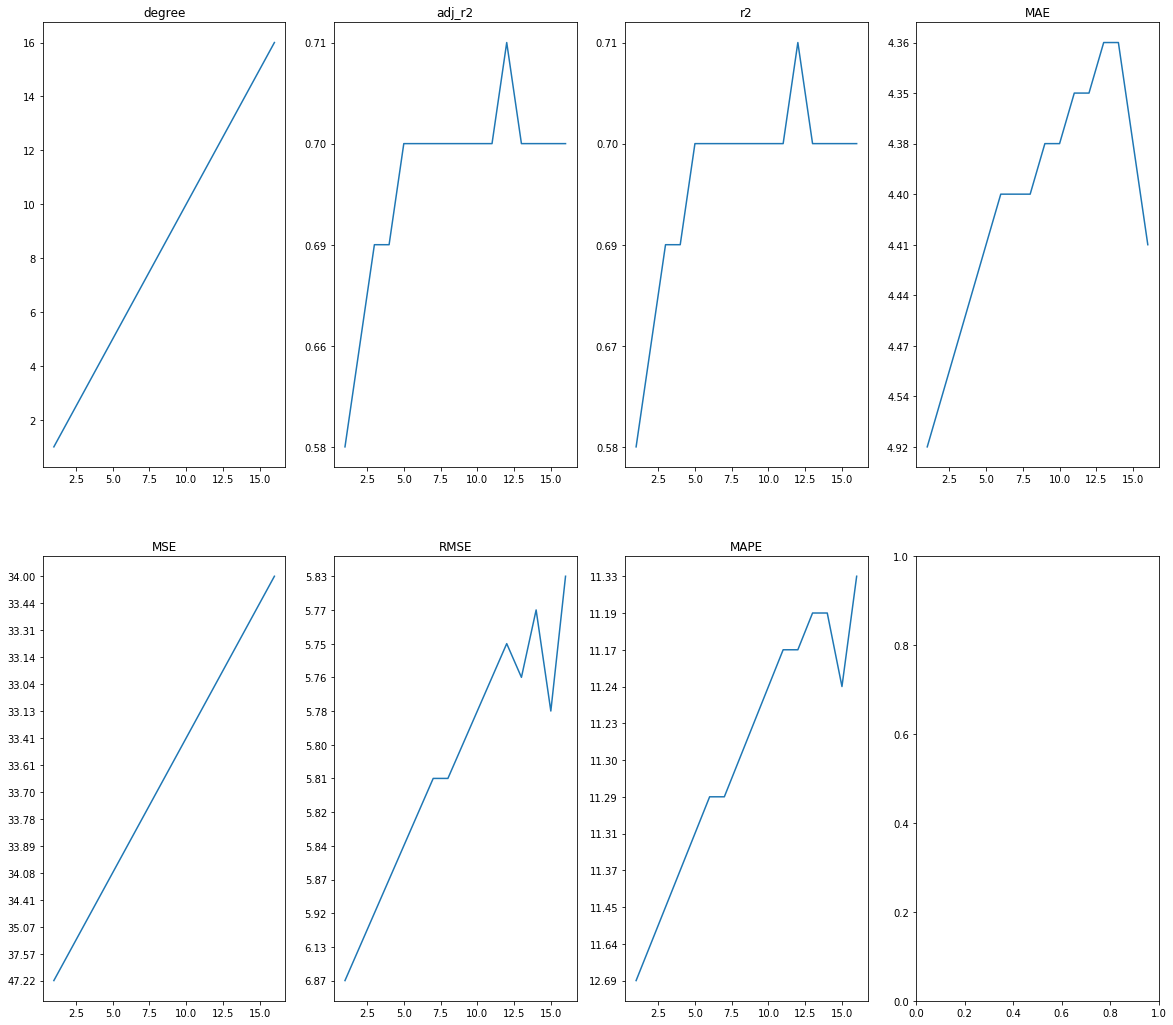

In [9]:
fig, ax = plt.subplots(2, 4, figsize = (20, 18))
for i in range(1, 8):
    plt.subplot(2, 4, i)
    plt.title(column_header[i-1])
    plt.plot(myErrors_df['degree'],myErrors_df[column_header[i-1]])